In [1]:
import networkx as nx
import osmnx as ox
from random import choices

%matplotlib inline
ox.__version__

'1.4.0'

In [2]:
from search_information import SearchInformation

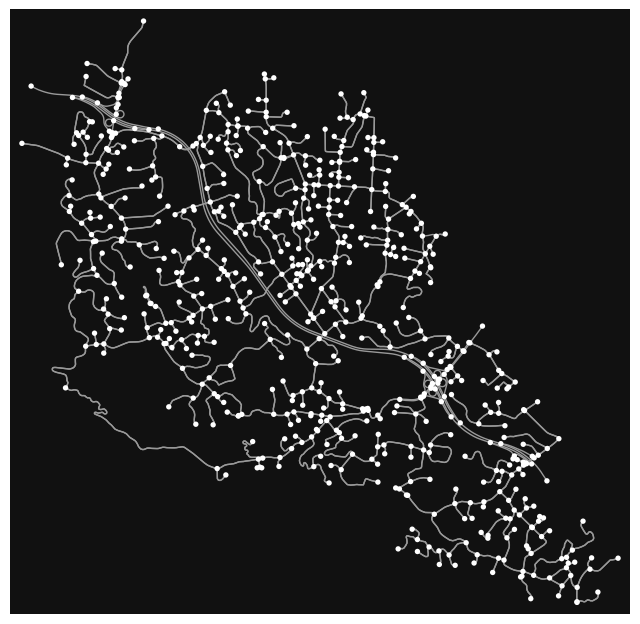

In [3]:
# download/model a street network for some city then visualize it
G = ox.graph_from_place(
    {'city': 'Los Altos Hills', 'state': 'California'}, network_type="drive", truncate_by_edge=True)
fig, ax = ox.plot_graph(G)

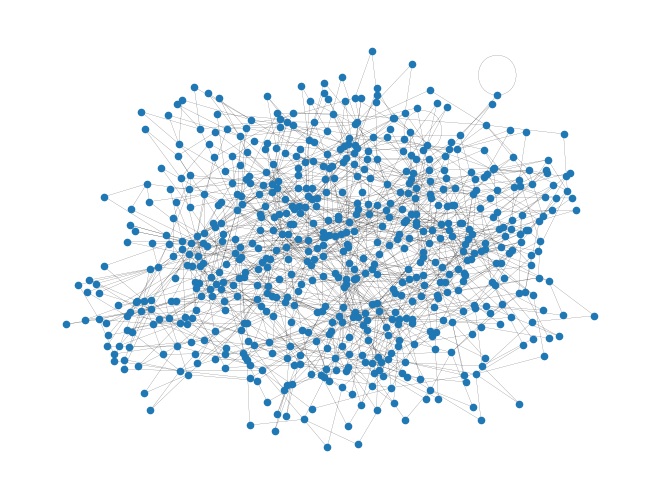

In [6]:
from street_continuity.all import *

primal_graph = from_osmnx(oxg=G, use_label=True)
dual_graph = dual_mapper(primal_graph=primal_graph, min_angle=90)
nx_dual_graph = nx.Graph(dual_graph.edge_dictionary)
nx.draw(nx_dual_graph, node_size=20, width=0.1)

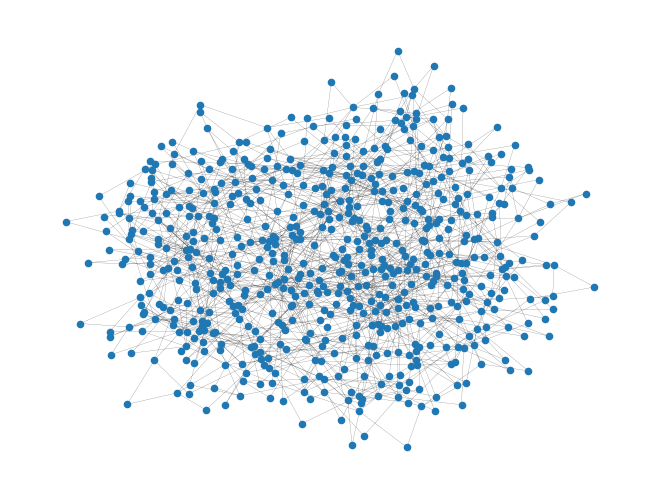

In [41]:
dxg = write_graphml(graph=d_graph, filename='file.graphml', directory='data')
write_supplementary(graph=d_graph, filename='supplementary.txt', directory='data')

In [42]:
d_graph = nx.read_graphml('data/file.graphml')

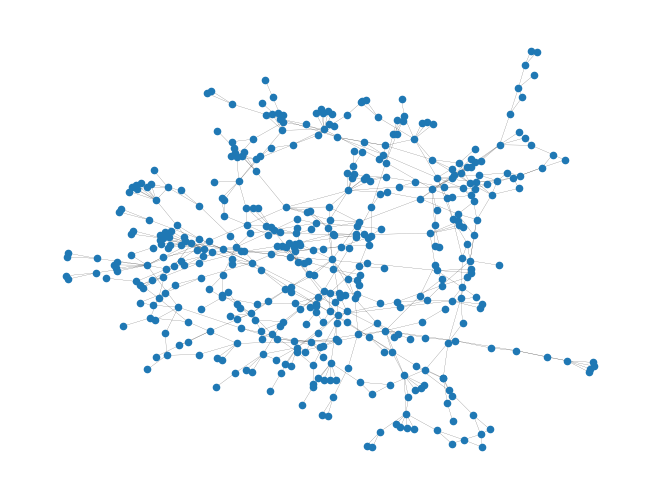

In [43]:
nx.draw(d_graph, node_size=20, width=0.1)

In [15]:
G_info = SearchInformation(G)
G_info.compute_average_search_information()

In [16]:
print(G_info.average_search_information)

In [8]:
random_nodes = choices(list(G.nodes()), k=2)

print(f'Start Node: {random_nodes[0]}\nTarget Node: {random_nodes[1]}')

route = nx.shortest_path(G, random_nodes[0],
                         random_nodes[1], weight='lenght/maxspeed[0]')

ox.plot_graph_route(G, route=route)


In [10]:
nx.plot(G)